In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.lines as mlines
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
from matplotlib import cm
import matplotlib as mpl
import matplotlib.patches as mpatches
from matplotlib.patches import FancyBboxPatch

from matplotlib import rcParams
rcParams['font.family'] = 'stixgeneral'
rcParams['font.size'] = 17
rcParams['text.usetex'] = True

In [16]:
def make_single_results_plot(fig, ax1, path_to_data, result_to_color_dictionary,legend_dictionary, 
                             patch_size, x_key = 'm2', y_key='initial_period_in_days', colormap='Purples', 
                             max_val=None, cbar_ax=None, min_p=None):
    '''
    Given a figure/axes objects, path to data, dictory of to color-code results, this function
    will use matplotlib.patches to add rectangles whereever results appear.
    
    
    Params
    -------
    fig: figure object; ax1: axis for left plot; ax2: axis for right plot
    
    ax1: axis to plot on. 
        Useful when you want to plot multiple grids at once, like Figure 1 in 
        Gallegos-Garcia et al. 2022
    
    result_to_color_dictionary: dictonary
        Dictionary with result as keys and corresponding color as element.
        All possible results must be in this dictionary.
        
        Example: result_to_color_dictionary = {'class1': 'red', 'class2': 'blue'}
        
    patch_size: list of integers, sets size of the rectangles 
        patch_size[0] = width of patch
        patch_size[1] = height of patch
        
    x_key: name of column that you want plotted on the x-axis
        
    max_val: maximum value for colorbar
        If you are plotting multiple grids on one plot, make sure this is set the same 
        for each grid
        
    Returns
    --------
    ax1:use this to edit the axis
        ax1.legend(handles = legend_list, args....)
    '''
 
    # load in data
    data = pd.read_csv(path_to_data, comment='#',delimiter=',')
    
    # in case you automatically want to exclude low period simulations
    if min_p is not None: 
        data = data[data['initial_period_in_days']>min_p]
        
    if x_key == 'q':    
        x_ = data['m2'].values/data['m1'].values
    x_ = data[x_key].values
    
    # assuming you always want period here 
    log_p_days = np.log10(data[y_key])

    #########################################################
    ###for merger during CE and errors, just show outcome ###
    failed_BNS_outcomes = ['CE_merger','error']
    # make a copy of dataframe including only rows where the outcome is CE_merger or error
    data_failed = data[ data['result'].isin(failed_BNS_outcomes) ].copy()
    class_result = data_failed['result'].values
    log_p_days = np.log10(data_failed[y_key].values)
    if x_key == 'q':    
        x_ = data_failed['m2'].values/data_failed['m1'].values
    else:
        x_ = data_failed[x_key].values
    data_ax1 = [x_, log_p_days, class_result]
    
    class_result_color_ax1 = []
    for result in data_ax1[2]:
        class_result_color_ax1.append(color_dictionary[result])
    # creating patches for ax1
    boxes_ax1 = []
    x_width, y_width = patch_size[0], patch_size[1]
    for x, y in zip(data_ax1[0], data_ax1[1]):
        rect = Rectangle(xy = (x - x_width/2, y - y_width/2), width = x_width, height = y_width)
        boxes_ax1.append(rect)
    pc_ax1 = PatchCollection(boxes_ax1, facecolor=class_result_color_ax1)
    ax1.add_collection(pc_ax1)
    
    #####################################################################
    # for binaries that did not merge during CE, show merger fraction ###  
    detached_BNS_outcomes = ['CE_ejection', 'CE_ejection_m']
    data_detached = data[ data['result'].isin(detached_BNS_outcomes)].copy()
    
    merge_prob = data_detached['n_merge'].values/data_detached['n_kicks'].values
    log_p_days = np.log10(data_detached[y_key])
    if x_key == 'q':    
        x_ = data_detached['m2'].values/data_detached['m1'].values
    else:
        x_ = data_detached[x_key].values
    
    # data points to plot
    data_ax1 = [x_, log_p_days, merge_prob]
    boxes_ax1 = []
    for x, y in zip(data_ax1[0], data_ax1[1]):
        rect = Rectangle(xy = (x - x_width/2, y - y_width/2), width = x_width, height = y_width)
        boxes_ax1.append(rect)
    if max_val is None:
        max_val = max(merge_prob)
        
    if do_log:
        norm = plt.cm.colors.LogNorm(vmax=max_val, vmin=0.001)
    else:
        norm = plt.cm.colors.Normalize(vmax=max_val, vmin=0.001)
    pc_ax1_range = PatchCollection(boxes_ax1, cmap=colormap, hatch='///', norm=norm)
    pc_ax1_range.set_array(merge_prob)
    ax1.add_collection(pc_ax1_range)  
    
    #############################################
    # same as above, but not inluding hashes ###  
    detached_BNS_outcomes = ['wide_binary']
    data_detached = data[ data['result'].isin(detached_BNS_outcomes)].copy()
    
    merge_prob = data_detached['n_merge'].values/data_detached['n_kicks'].values
    log_p_days = np.log10(data_detached[y_key])
    if x_key == 'q':    
        x_ = data_detached['m2'].values/data_detached['m1'].values
    else:
        x_ = data_detached[x_key].values
    
    # data points to plot
    data_ax1 = [x_, log_p_days, merge_prob]
    boxes_ax1 = []
    for x, y in zip(data_ax1[0], data_ax1[1]):
        rect = Rectangle(xy = (x - x_width/2, y - y_width/2), width = x_width, height = y_width)
        boxes_ax1.append(rect)
        
    if do_log:
        norm = plt.cm.colors.LogNorm(vmax=max_val, vmin=0.001)
    else:
        norm = plt.cm.colors.Normalize(vmax=max_val, vmin=0.001)
    pc_ax1 = PatchCollection(boxes_ax1, cmap=colormap, norm=norm)
    pc_ax1.set_array(merge_prob)
    ax1.add_collection(pc_ax1)   
    

    ###############################################################
    # if n_merge = 0 for any detached binary, show as disrupted ###  
    detached_BNS_outcomes = ['wide_binary']
    data_detached = data[ data['result'].isin(detached_BNS_outcomes)].copy()
    
    merge_prob = data_detached['n_merge'].values/data_detached['n_kicks'].values
    where_0 = np.where(merge_prob==0)[0]
    
    log_p_days = np.log10(data_detached[y_key].values[where_0])
    if x_key == 'q':    
        x_ = data_detached['m2'].values/data_detached['m1'].values
    else:
        x_ = data_detached[x_key].values
    
    # data points to plot
    data_ax1 = [x_, log_p_days, merge_prob[where_0]]
    boxes_ax1 = []
    for x, y in zip(data_ax1[0], data_ax1[1]):
        rect = Rectangle(xy = (x - x_width/2, y - y_width/2), width = x_width, height = y_width)
        boxes_ax1.append(rect)
        
    pc_ax1 = PatchCollection(boxes_ax1, facecolor=color_dictionary['wide_binary'])
    ax1.add_collection(pc_ax1)   

    ###############################################################
    # if n_merge = 0 for any detached binary, show as disrupted ###  
    detached_BNS_outcomes = ['CE_ejection', 'CE_ejection_m']
    data_detached = data[ data['result'].isin(detached_BNS_outcomes)].copy()
    
    merge_prob = data_detached['n_merge'].values/data_detached['n_kicks'].values
    where_0 = np.where(merge_prob==0)[0]
    
    log_p_days = np.log10(data_detached[y_key].values[where_0])
    q = data_detached[x_key].values[where_0]
    
    # data points to plot
    data_ax1 = [q, log_p_days, merge_prob[where_0]]
    boxes_ax1 = []
    for x, y in zip(data_ax1[0], data_ax1[1]):
        rect = Rectangle(xy = (x - x_width/2, y - y_width/2), width = x_width, height = y_width)
        boxes_ax1.append(rect)

    pc_ax1 = PatchCollection(boxes_ax1, facecolor=color_dictionary['wide_binary'], hatch='///')
    ax1.add_collection(pc_ax1)      
    
    
    # creating legend
    legend_list = []
    for classification in color_dictionary.keys():
        color_for_class = color_dictionary[classification]
        # making up lines so that I can use their lables for my legend
        handle = mlines.Line2D([], [], color=color_for_class, linestyle = 'None',marker='s', markersize=11, 
                               label=legend_dictionary[classification])
        legend_list.append(handle)

    handle = mpatches.Patch(hatch='//', label='CE ejection', facecolor='white')
    legend_list.append(handle)

    path_list = path_to_data.split('/')
    file_name = '/'.join(path_list[-3:])
    print(file_name)
    
    return ax1,  legend_list, pc_ax1_range 

def check_max_merger_prob(path_to_data):
    data = pd.read_csv(path_to_data, comment='#',delimiter=',')  
    data = data[ data['n_kicks'].values>0 ]
    p_merge = np.round(data['n_merge'].values/data['n_kicks'].values, 3)
    return max(p_merge)

In [17]:
color_dictionary = {'CE_merger':     '#FFAE00',
                  'wide_binary': '#FFADBF'}

legend_dictionary = {'CE_merger':     'merger during CE',
                  'wide_binary': 'non-merging'}

MESA_sims/solar_top/grid_results_solar_final_new_init_amended_tmerger_dist_Tauris_ECSN.csv
MESA_sims/solar_not_solar/grid_results_subsolar_final_tmerger_dist_Tauris_ECSN.csv


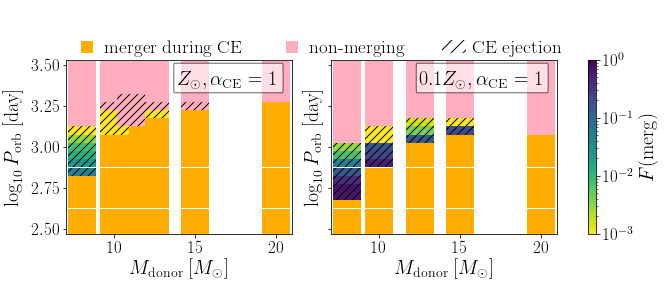

In [18]:
sims = '/projects/b1095/monicagg/BNS/MESA_sims'

data_standard_Pod = sims+'/solar_top/grid_results_solar_final_new_init_amended_tmerger_dist_Pod_ECSN_2.csv'
data_standard_Tauris = sims+'/solar_top/grid_results_solar_final_new_init_amended_tmerger_dist_Tauris_ECSN.csv'

data_subsolar_Tauris = sims+'/solar_not_solar/grid_results_subsolar_final_tmerger_dist_Tauris_ECSN.csv'
data_subsolar_Pod = sims+'/solar_not_solar/grid_results_subsolar_final_tmerger_dist_Pod_ECSN.csv'


# ----------------------------------------------------------------------
# patch size
x_width = 1.75 #0.36 # 0.18
y_width = 0.049
label_fontsize = 20
patch_size = [x_width, y_width]
do_log= True

# ----------------------------------------------------------------------
# create figure
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(11,3.2), sharex=True, sharey=True) 
plt.subplots_adjust(wspace=0.17)
ax[0].set_ylim(2.47, 3.53)
ax[0].set_xlim(7, 21)
# ----------------------------------------------------------------------


# ---------------------------------------------------------------
# -----------------------    solar      -------------------------
ax[0], legend_list, pc_ax1_range = make_single_results_plot(fig, ax[0], data_standard_Tauris, color_dictionary, legend_dictionary, patch_size,
                                           x_key = 'm1', y_key='initial_period_in_days', colormap='viridis_r', max_val=1)

# add legend
handle = mlines.Line2D([], [], color='red', 
                       linestyle = 'None',marker=None, markersize=None, label=r'$Z_{\odot},\alpha_{\mathrm{CE}}=1$')
L4 = ax[0].legend(handles = [handle], loc = 'upper right', 
       fontsize = label_fontsize, frameon = False ,handletextpad=0, handlelength=0, borderpad=0.2, framealpha=0.95)

fancy = FancyBboxPatch((13.7, 3.36), 6.7, 0.12, facecolor='white', edgecolor='k', boxstyle="round",mutation_scale=0.1, alpha=0.6)
ax[0].add_patch(fancy)


# ---------------------------------------------------------------
# -----------------------    sub solar      ---------------------
ax[1], legend_list, pc_ax1_range = make_single_results_plot(fig, ax[1], data_subsolar_Tauris, color_dictionary, legend_dictionary, patch_size,
                                           x_key = 'm1', y_key='initial_period_in_days', colormap='viridis_r', max_val=1)

# add legend
handle = mlines.Line2D([], [], color='red', 
                       linestyle = 'None',marker=None, markersize=None, label=r'$0.1 Z_{\odot}, \alpha_{\mathrm{CE}}=1$')
L4 = ax[1].legend(handles = [handle], loc = 'upper right', 
       fontsize = label_fontsize, frameon = False ,handletextpad=0, handlelength=0, borderpad=0.2, framealpha=0.95)
fancy = FancyBboxPatch((12.32, 3.36), 8.1, 0.12, facecolor='white', edgecolor='k', boxstyle="round",mutation_scale=0.1, alpha=0.6)
ax[1].add_patch(fancy)

# add colorbar
cbar = fig.colorbar(pc_ax1_range, ax=[ax[0],ax[1]])
cbar.set_label(r'$F(\mathrm{merg})$', fontsize=20, useTex=True)    

# add labels
ax[0].set_xlabel(r'$M_{\rm donor} \ [M_{\odot}]$', usetex=True,fontsize=20)
ax[1].set_xlabel(r'$M_{\rm donor} \ [M_{\odot}]$', usetex=True,fontsize=20)
ax[0].set_ylabel(r'$\log_{10}P_{\rm orb} \ [{\rm day}]$', usetex=True,fontsize=20)
ax[1].set_ylabel(r'$\log_{10}P_{\rm orb} \ [{\rm day}]$', usetex=True,fontsize=20)

# add legend
fig.legend( handles = legend_list, bbox_to_anchor=(0.4,1.04), loc = 'center', fontsize = 19., 
         frameon = False, handletextpad=0.3, handlelength = 1.3, ncol = 4, numpoints = 1 )
#plt.savefig('test.pdf',bbox_inches='tight') #idk why but the hatch pattern does not appear in browers
plt.show()